# VCF Parsing
## Introduction
fastDFE provides parser utilities that enable convenient parsing of frequency spectra from VCF files. By default, {class}`~fastdfe.parser.Parser` looks at the ``AA`` tag in the VCF file's info field to retrieve the correct polarization. Sites for which this tag is not well-defined are by default included (see {attr}`~fastdfe.parser.Parser.skip_not_polarized`). Note that non-polarized frequency spectra provide little information on the distribution of beneficial mutations, however.

We might also want to stratify the SFS by some site properties, such as synonymy. This is done by passing stratifications to the parser. In this example, we will stratify the SFS by synonymous and non-synonymous mutations using a VCF file for ``Betula spp.``

In [3]:
import fastdfe as fd

# url to the GitHub repository of fastDFE
url = "https://github.com/Sendrowski/fastDFE/blob/dev/"

In [4]:
# instantiate parser
p = fd.Parser(
    n=8,
    vcf=url + "resources/genome/betula/biallelic.subset.50000.vcf.gz?raw=true",
    fasta=url + "resources/genome/betula/genome.subset.1000.fasta.gz?raw=true",
    gff=url + "resources/genome/betula/genome.gff.gz?raw=true",
    annotations=[
        fd.DegeneracyAnnotation(),
        fd.MaximumParsimonyAncestralAnnotation()  # only partly recommended
    ],
    stratifications=[fd.DegeneracyStratification()]
)

# parse SFS
spectra: fd.Spectra = p.parse()

INFO:fastdfe.Parser: Using stratification: [neutral, selected].
INFO:fastdfe.Parser: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/211142f65e7c.biallelic.subset.50000.vcf.gz
INFO:fastdfe.Parser: Loading GFF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/2d03158a125f.genome.gff.gz
INFO:fastdfe.Parser: Loading FASTA file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/eb1f2b2b0185.genome.subset.1000.fasta.gz
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/211142f65e7c.biallelic.subset.50000.vcf.gz
Counting sites: 50000it [00:01, 32702.15it/s]
Processing sites: 100%|██████████| 50000/50000 [02:07<00:00, 392.84it/s]
INFO:fastdfe.PolyAllelicFiltration: Filtered out 0 sites.
INFO:fastdfe.DegeneracyStratification: Number of sites with valid type: 14084
INFO:fastdfe.DegeneracyAnnotation: Annotated 18906 sites.
INFO:fastdfe.Maxi

<Figure size 512x384 with 0 Axes>

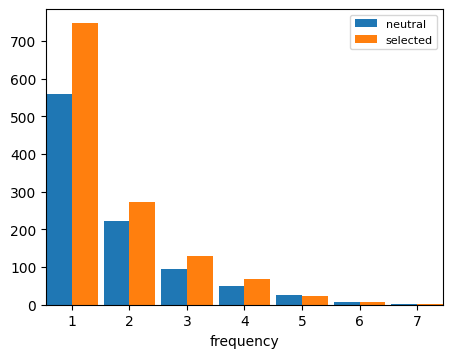

In [5]:
# visualize SFS
spectra.plot();

fastDFE relies here on VCF info tags to determine the degeneracy of a site but this behavior can be customized (cf. {class}`~fastdfe.parser.DegeneracyStratification`).

## Stratifications
We can use also several stratifications in tandem by specifying a list of stratifications. In this example, we will stratify the SFS by synonymy as well as base transitions type. The resulting spectra can be fed directly into fastDFE's inference routines. See {mod}`~fastdfe.parser` module for a complete list of available stratifications.

In [6]:
# instantiate parser
p = fd.Parser(
    n=10,
    vcf=url + "resources/genome/betula/biallelic.subset.50000.vcf.gz?raw=true",
    fasta=url + "resources/genome/betula/genome.subset.1000.fasta.gz?raw=true",
    gff=url + "resources/genome/betula/genome.gff.gz?raw=true",
    annotations=[
        fd.DegeneracyAnnotation(),
        fd.MaximumParsimonyAncestralAnnotation()  # only partly recommended
    ],
    stratifications=[
        fd.DegeneracyStratification(),
        fd.AncestralBaseStratification()
    ]
)

# parse SFS
spectra: fd.Spectra = p.parse()

INFO:fastdfe.Parser: Using stratification: [neutral, selected].[A, C, G, T].
INFO:fastdfe.Parser: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/211142f65e7c.biallelic.subset.50000.vcf.gz
INFO:fastdfe.Parser: Loading GFF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/2d03158a125f.genome.gff.gz
INFO:fastdfe.Parser: Loading FASTA file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/eb1f2b2b0185.genome.subset.1000.fasta.gz
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/211142f65e7c.biallelic.subset.50000.vcf.gz
Counting sites: 50000it [00:01, 32319.40it/s]
Processing sites: 100%|██████████| 50000/50000 [02:08<00:00, 389.27it/s]
INFO:fastdfe.PolyAllelicFiltration: Filtered out 0 sites.
INFO:fastdfe.DegeneracyStratification: Number of sites with valid type: 14084
INFO:fastdfe.AncestralBaseStratification: Number of sites with

<Figure size 512x384 with 0 Axes>

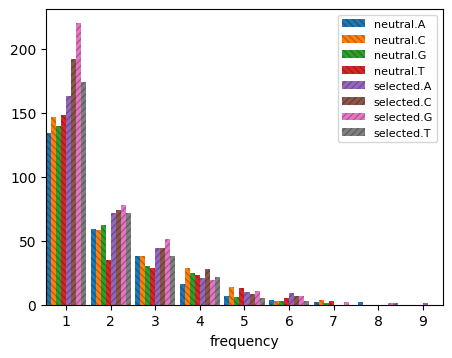

In [7]:
# visualize SFS
spectra.plot();

Note that fastDFE requires the ancestral state of sites to be determined. The {class}`~fastdfe.parser.Parser` achieves this by examining the `AA` field, although this behavior can be customized.

## Annotations
fastDFE provides a number of annotations accessible directly during the parsing process. To annotate a VCF file directly, consider using the {class}`~fastdfe.annotation.Annotator` class.

### Degeneracy Annotation
{class}`~fastdfe.annotation.DegeneracyAnnotation` annotates the SFS by the degeneracy of the site. This annotation requires information from a FASTA and GFF file and is useful for stratifying the SFS by 0-fold and 4-fold degenerate sites which is what we often want to do when inferring the DFE (see {class}`~fastdfe.parser.DegeneracyStratification`).


In [8]:
# example for degeneracy annotation
ann = fd.Annotator(
    vcf=url + "resources/genome/betula/biallelic.subset.10000.vcf.gz?raw=true",
    fasta=url + "resources/genome/betula/genome.subset.1000.fasta.gz?raw=true",
    gff=url + "resources/genome/betula/genome.gff.gz?raw=true",
    annotations=[fd.DegeneracyAnnotation()],
    output="out/genome.deg.vcf.gz"
)

ann.annotate()

INFO:fastdfe.Annotator: Start annotating
INFO:fastdfe.Annotator: Loading GFF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/2d03158a125f.genome.gff.gz
INFO:fastdfe.Annotator: Loading FASTA file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/eb1f2b2b0185.genome.subset.1000.fasta.gz
INFO:fastdfe.Annotator: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/7a41c74709e8.biallelic.subset.10000.vcf.gz
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/7a41c74709e8.biallelic.subset.10000.vcf.gz
Counting sites: 10000it [00:00, 32111.27it/s]
Processing sites: 100%|██████████| 10000/10000 [00:02<00:00, 3844.01it/s]
INFO:fastdfe.DegeneracyAnnotation: Annotated 3566 sites.


### Ancestral Allele Annotation
Currently, two ancestral allele annotations are available: {class}`~fastdfe.annotation.MaximumParsimonyAncestralAnnotation` and {class}`~fastdfe.annotation.MaximumLikelihoodAncestralAnnotation`. The former is straightforward but susceptible to errors, and only appropriate if no outgroup information is available. Some errors can be avoided by incorporating {class}`~fastdfe.filtration.DeviantOutgroupFiltration`. Alternatively, DFE inference can also be performed on folded spectra, but please note that this will yield less precise estimates. {class}`~fastdfe.annotation.MaximumLikelihoodAncestralAnnotation` is more sophisticated and requires one or several outgroup to be specified. Its underlying model is very similar to [EST-SFS](https://doi.org/10.1534/genetics.118.301120).

In [9]:
# example for ancestral allele annotation with outgroups
ann = fd.Annotator(
    vcf=url + "resources/genome/betula/biallelic.with_outgroups.subset.10000.vcf.gz?raw=true",
    annotations=[fd.MaximumLikelihoodAncestralAnnotation(
        outgroups=["ERR2103730", "ERR2103731"],
        n_ingroups=15
    )],
    output="out/genome.aa.vcf.gz"
)

ann.annotate()

INFO:fastdfe.Annotator: Start annotating
INFO:fastdfe.Annotator: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/d2a32f6ed097.biallelic.with_outgroups.subset.10000.vcf.gz
INFO:fastdfe.Annotator: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/d2a32f6ed097.biallelic.with_outgroups.subset.10000.vcf.gz
INFO:fastdfe.MaximumLikelihoodAncestralAnnotation: Subsampling 15 ingroup haplotypes from 377 individuals in total.
INFO:fastdfe.MaximumLikelihoodAncestralAnnotation: Using 2 outgroup samples (ERR2103730, ERR2103731).
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/d2a32f6ed097.biallelic.with_outgroups.subset.10000.vcf.gz
Counting sites: 10000it [00:00, 32576.89it/s]
Parsing sites: 100%|██████████| 10000/10000 [00:24<00:00, 411.04it/s]
INFO:fastdfe.MaximumLikelihoodAncestralAnnotation: Included 7041 sites for the inference.
Processing sites: 100%|████

## Filtrations
fastDFE also offers a number of filtrations which can be accessed immediately while parsing. Alternatively, to filter a VCF file directly, use the {class}`~fastdfe.filtration.Filterer` class. Some useful filtrations include {class}`~fastdfe.filtration.DeviantOutgroupFiltration`, {class}`~fastdfe.filtration.CodingSequenceFiltration`, and {class}`~fastdfe.filtration.BiasedGCConversionFiltration`. For a complete list of available filtrations, refer to the API reference.

In [11]:
# example for filtration
f = fd.Filterer(
    vcf=url + "resources/genome/betula/biallelic.subset.10000.vcf.gz?raw=true",
    filtrations=[fd.BiasedGCConversionFiltration()],
    output="out/genome.gc.vcf.gz"
)

f.filter()

INFO:fastdfe.Filterer: Start filtering
INFO:fastdfe.Filterer: Loading VCF file
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/7a41c74709e8.biallelic.subset.10000.vcf.gz
INFO:fastdfe: Using cached file at /var/folders/w6/18ktl5312413jw46btlxrh59fzxvt4/T/7a41c74709e8.biallelic.subset.10000.vcf.gz
Counting sites: 10000it [00:00, 32068.55it/s]
Processing sites: 100%|██████████| 10000/10000 [00:00<00:00, 11466.39it/s]
INFO:fastdfe.BiasedGCConversionFiltration: Filtered out 7903 sites.
INFO:fastdfe.Filterer: Filtered out 7903 of 10000 sites in total.


Note that all components can easily be customized by extending the corresponding base class.